In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from sklearn.manifold import MDS
from tensorflow.keras import models

from keras.utils import to_categorical
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Model, Sequential
from sklearn.manifold import Isomap


In [3]:
def load_fashion_mnist_from_csv(train_csv_path, test_csv_path):
    # Load training data
    train_df = pd.read_csv(train_csv_path)
    train_labels = train_df['label'].values
    train_pixels = train_df.drop('label', axis=1).values.reshape(-1,784)

    # Load test data
    test_df = pd.read_csv(test_csv_path)
    test_labels = test_df['label'].values
    test_pixels = test_df.drop('label', axis=1).values.reshape(-1,784)

    return (train_pixels, train_labels), (test_pixels, test_labels)


In [4]:
(train, train_label), (test, test_label) = load_fashion_mnist_from_csv('fashion-mnist_train.csv', 'fashion-mnist_test.csv')

In [5]:
num_samples = 5000
idx = np.random.choice(train.shape[0], num_samples, replace=False)
subset_train = train[idx]
subset_train_labels = train_label[idx]

In [6]:
subset_train_reshaped = subset_train.reshape(-1, 784)

In [8]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

In [28]:
subset_train = train[:500]
subset_train_labels = train_label[:500]

n_perplexity_values = [1, 3, 5, 7]
n_components_values = [ 2, 3]

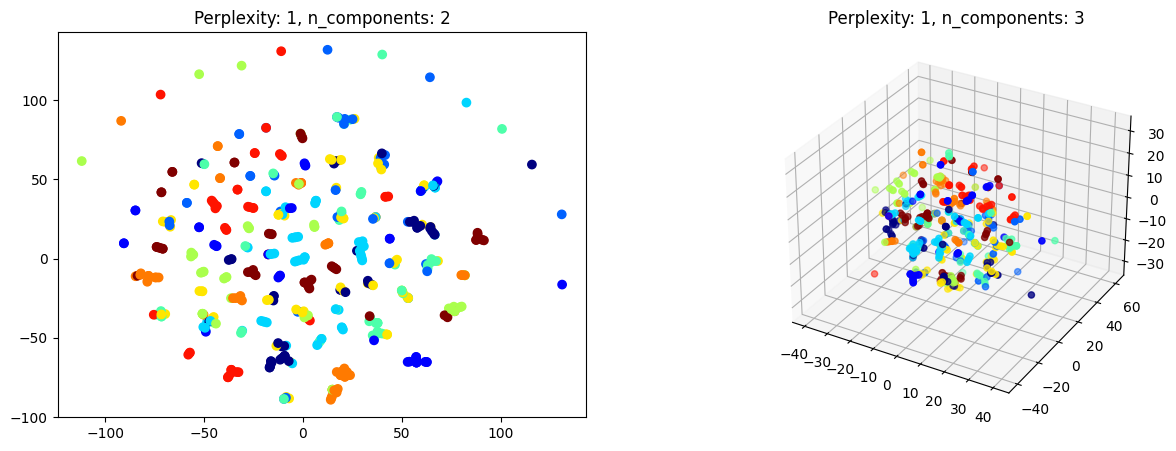

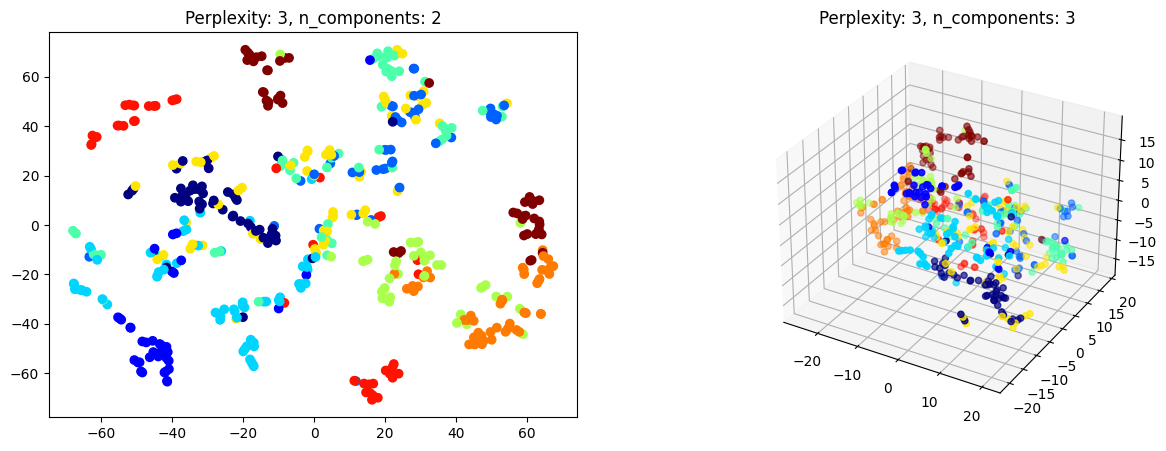

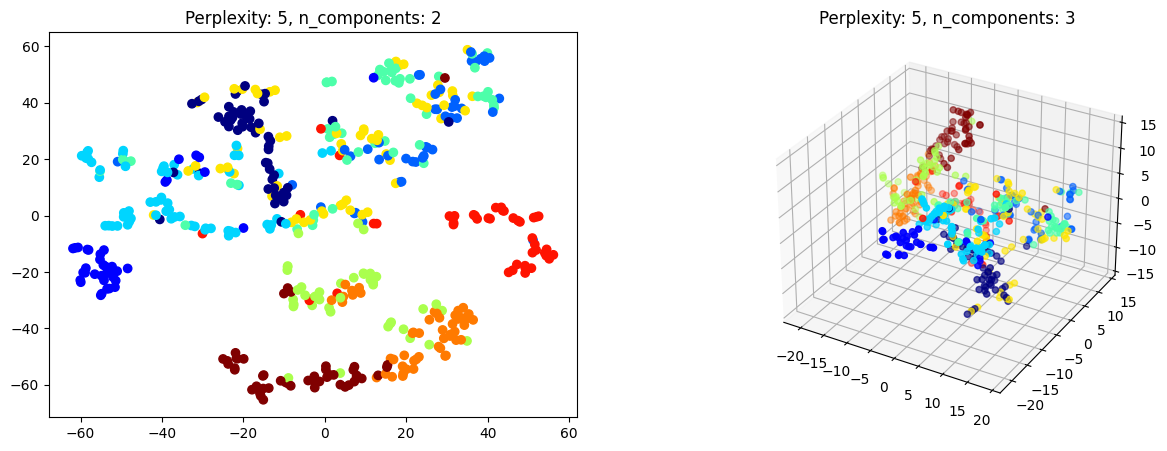

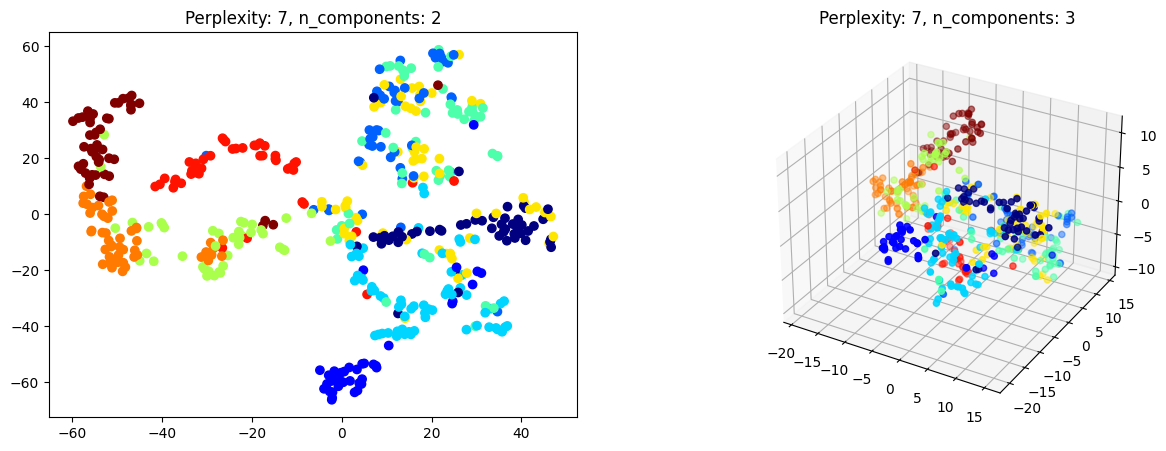

In [29]:
transformed_tsne_data_list = []

for perplexity_val in n_perplexity_values:
    plt.figure(figsize=(15, 5))
    for i, n_components_val in enumerate(n_components_values):
        
        # t-SNE
        tsne = TSNE(n_components=n_components_val, perplexity=perplexity_val, random_state=42)
        transformed_tsne_data = tsne.fit_transform(subset_train)
        transformed_tsne_data_list.append((perplexity_val, n_components_val, transformed_tsne_data))
        
        if n_components_val == 1:
            ax = plt.subplot(1, len(n_components_values), i + 1)
            plt.scatter(transformed_tsne_data, np.zeros_like(transformed_tsne_data), c=subset_train_labels, cmap='jet')
        elif n_components_val == 2:
            ax = plt.subplot(1, len(n_components_values), i + 1)
            plt.scatter(transformed_tsne_data[:, 0], transformed_tsne_data[:, 1], c=subset_train_labels, cmap='jet')
        elif n_components_val == 3:
            ax = plt.subplot(1, len(n_components_values), i + 1, projection='3d')  # 3D subplot
            ax.scatter(transformed_tsne_data[:, 0], transformed_tsne_data[:, 1], transformed_tsne_data[:, 2], c=subset_train_labels, cmap='jet')
        
        plt.title(f'Perplexity: {perplexity_val}, n_components: {n_components_val}')
        
    plt.show()


In [21]:
from sklearn.manifold import LocallyLinearEmbedding

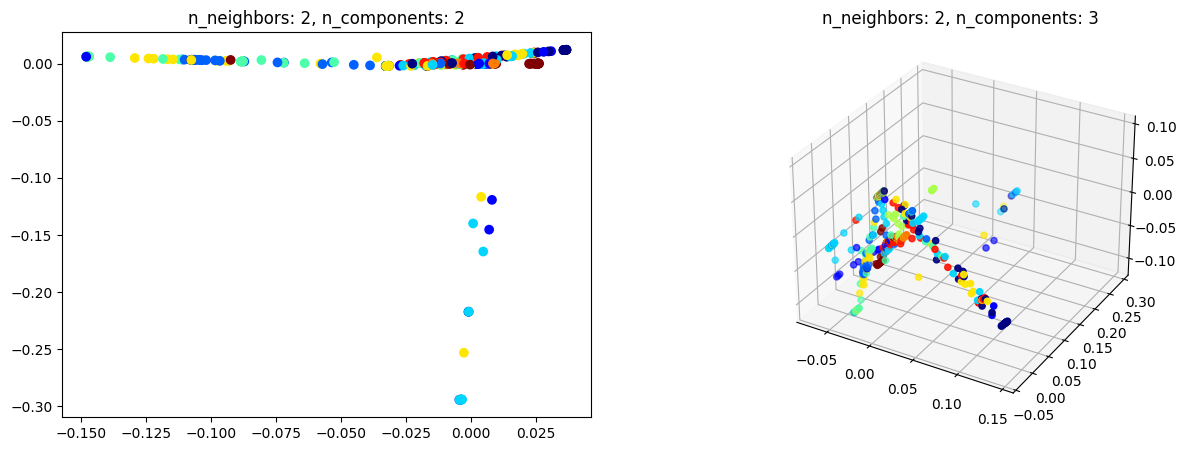

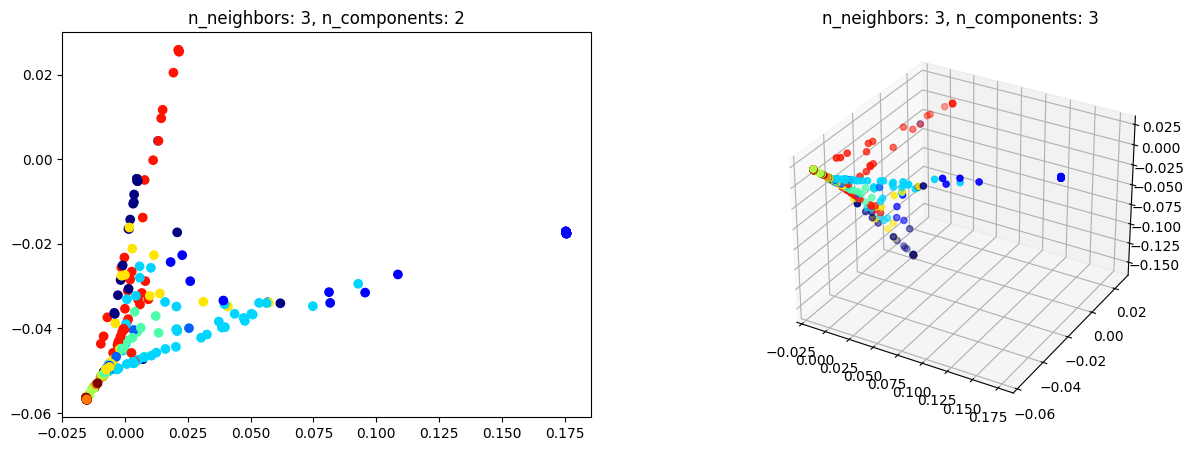

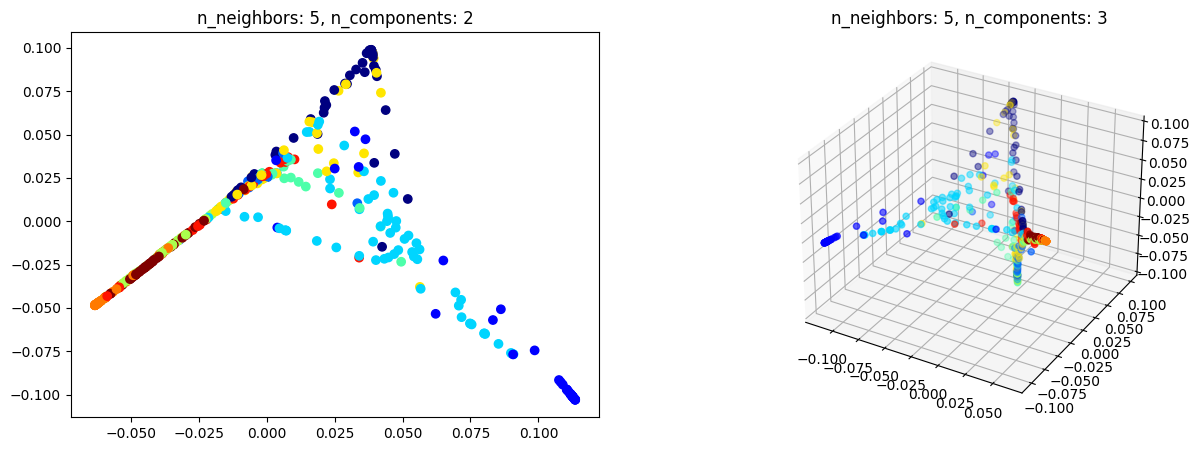

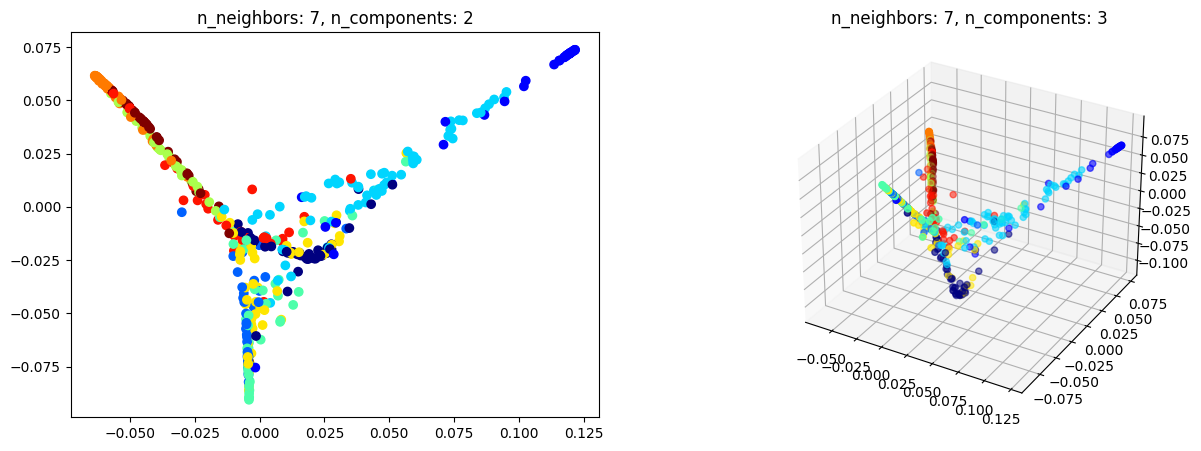

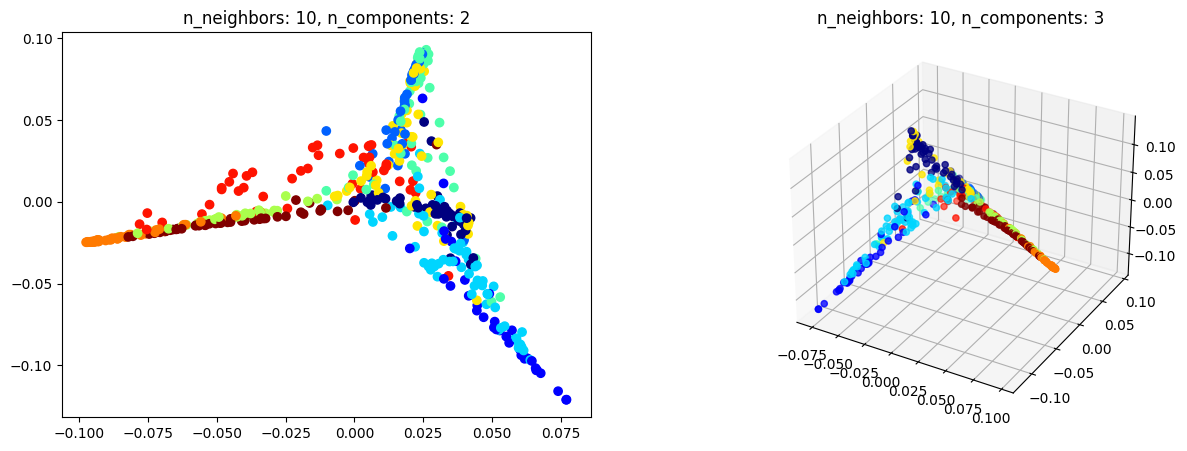

In [27]:
subset_train = train[:500]
subset_train_labels = train_label[:500]

n_neighbors_values = [  2, 3, 5, 7, 10]
n_components_values = [ 2, 3]

transformed_lle_data_list = []

for n_neighbors_val in n_neighbors_values:
    plt.figure(figsize=(15, 5))
    for i, n_components_val in enumerate(n_components_values):
        
        # LLE
        lle = LocallyLinearEmbedding(n_neighbors=n_neighbors_val, n_components=n_components_val)
        transformed_lle_data = lle.fit_transform(subset_train)
        transformed_lle_data_list.append((n_neighbors_val, n_components_val, transformed_lle_data))
        
        if n_components_val == 1:
            ax = plt.subplot(1, len(n_components_values), i + 1)
            plt.scatter(transformed_lle_data, np.zeros_like(transformed_lle_data), c=subset_train_labels, cmap='jet')
        elif n_components_val == 2:
            ax = plt.subplot(1, len(n_components_values), i + 1)
            plt.scatter(transformed_lle_data[:, 0], transformed_lle_data[:, 1], c=subset_train_labels, cmap='jet')
        elif n_components_val == 3:
            ax = plt.subplot(1, len(n_components_values), i + 1, projection='3d')  # 3D subplot
            ax.scatter(transformed_lle_data[:, 0], transformed_lle_data[:, 1], transformed_lle_data[:, 2], c=subset_train_labels, cmap='jet')
        
        plt.title(f'n_neighbors: {n_neighbors_val}, n_components: {n_components_val}')
        
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


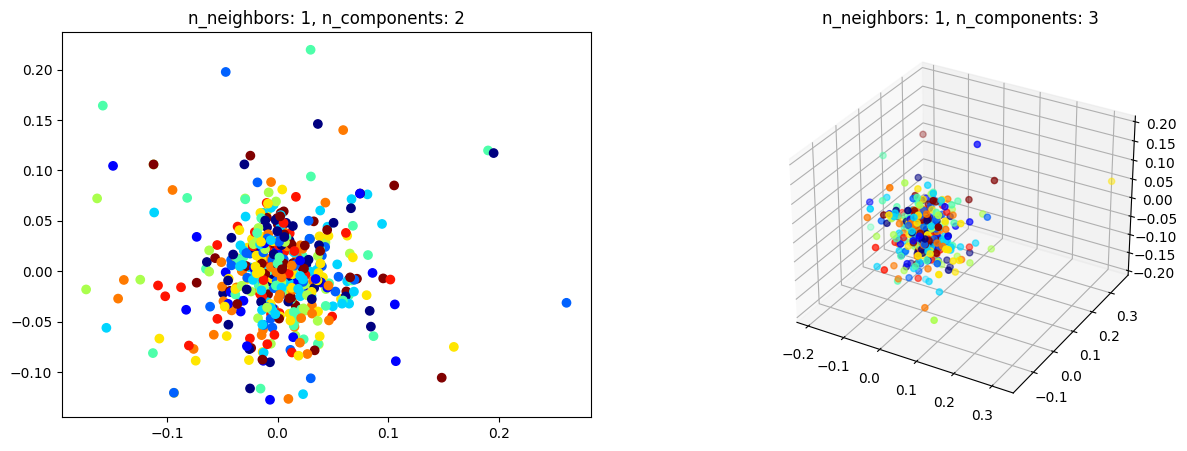

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


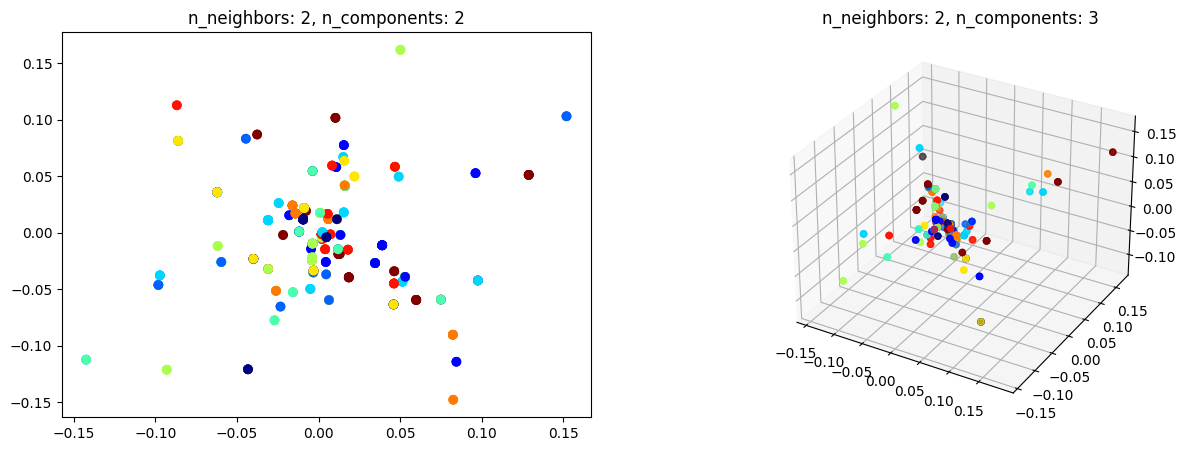

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


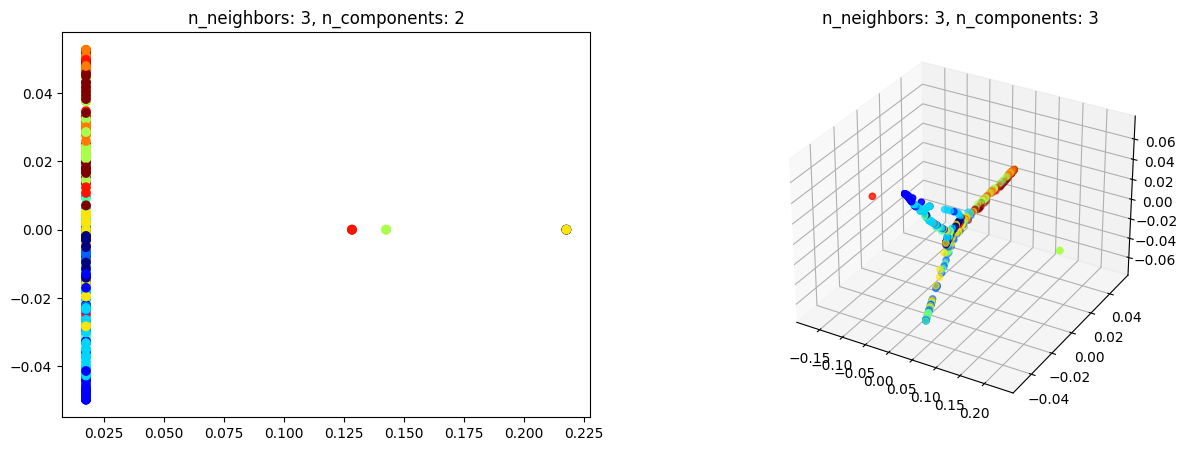

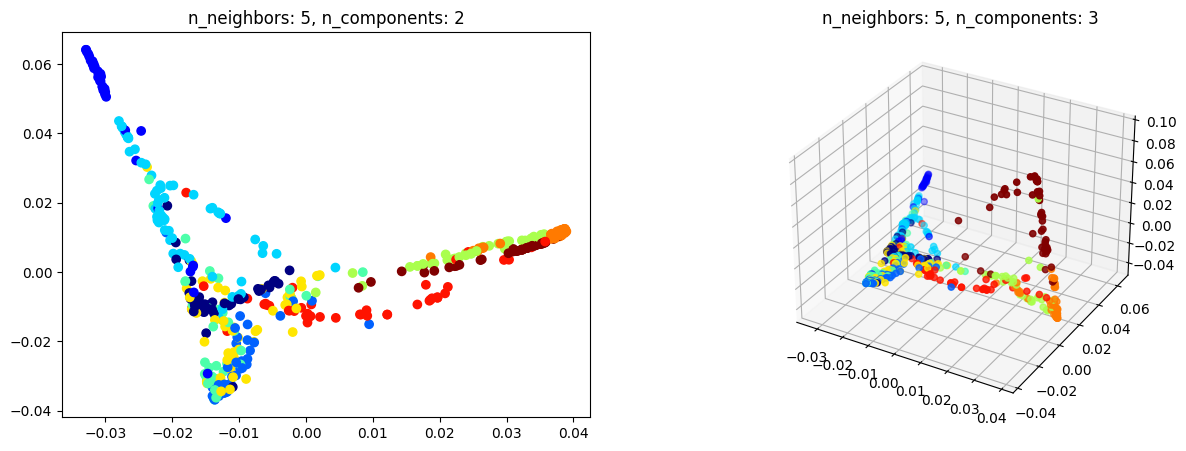

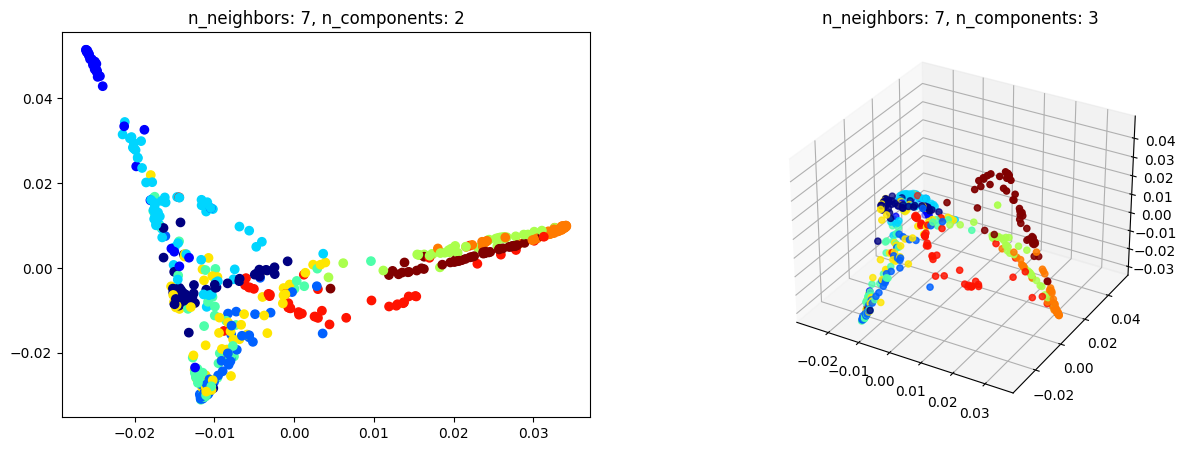

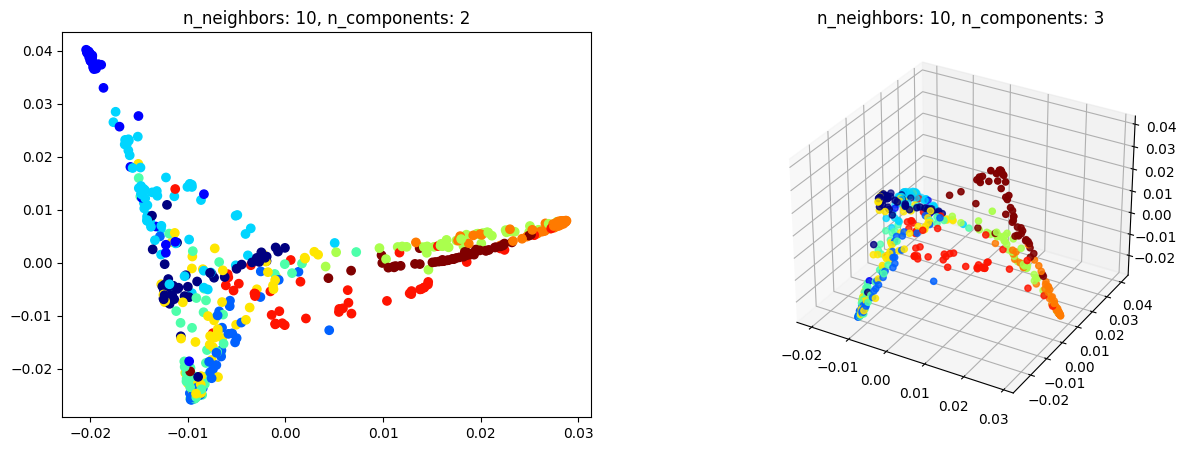

In [32]:
from sklearn.manifold import SpectralEmbedding

subset_train = train[:500]
subset_train_labels = train_label[:500]

n_neighbors_values = [1, 2, 3, 5, 7,10]
n_components_values = [ 2, 3]

transformed_spectral_data_list = []

for n_neighbors_val in n_neighbors_values:
    plt.figure(figsize=(15, 5))
    for i, n_components_val in enumerate(n_components_values):
        
        # Spectral Embedding
        spectral = SpectralEmbedding(n_neighbors=n_neighbors_val, n_components=n_components_val)
        transformed_spectral_data = spectral.fit_transform(subset_train)
        transformed_spectral_data_list.append((n_neighbors_val, n_components_val, transformed_spectral_data))
        
        if n_components_val == 1:
            ax = plt.subplot(1, len(n_components_values), i + 1)
            plt.scatter(transformed_spectral_data, np.zeros_like(transformed_spectral_data), c=subset_train_labels, cmap='jet')
        elif n_components_val == 2:
            ax = plt.subplot(1, len(n_components_values), i + 1)
            plt.scatter(transformed_spectral_data[:, 0], transformed_spectral_data[:, 1], c=subset_train_labels, cmap='jet')
        elif n_components_val == 3:
            ax = plt.subplot(1, len(n_components_values), i + 1, projection='3d')  # 3D subplot
            ax.scatter(transformed_spectral_data[:, 0], transformed_spectral_data[:, 1], transformed_spectral_data[:, 2], c=subset_train_labels, cmap='jet')
        
        plt.title(f'n_neighbors: {n_neighbors_val}, n_components: {n_components_val}')
        
    plt.show()
